In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./dataset/SUV_Network_Ads.csv')

In [3]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df.drop('User ID', axis=1, inplace=True)
df.rename(columns={'Gender':'gender' ,'Age': 'age', 'EstimatedSalary': 'estimated_salary', 'Purchased': 'purchased'}, inplace=True)

In [7]:

df = pd.get_dummies(df, columns=['gender'], drop_first=False)

In [8]:
df['gender_Female'] = df['gender_Female'].astype('int')
df['gender_Male'] = df['gender_Male'].astype('int')

In [9]:
X = df.drop('purchased', axis=1)
y = df['purchased']

In [10]:
import statsmodels.api as sm

x_with_const = sm.add_constant(X)
model = sm.OLS(y, x_with_const).fit()

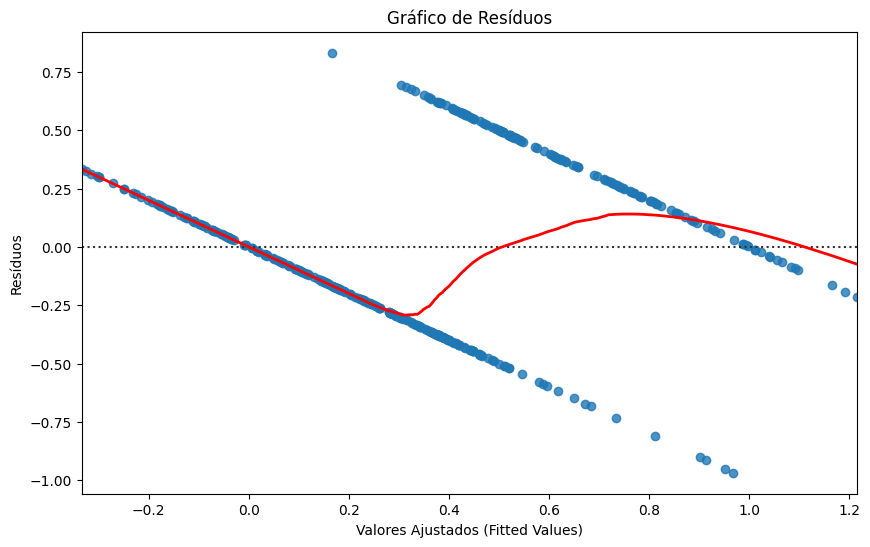

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Gráfico de Resíduos')
plt.xlabel('Valores Ajustados (Fitted Values)')
plt.ylabel('Resíduos')
plt.show()



In [12]:
# Durbin-Watson Test
from statsmodels.stats.stattools import durbin_watson
print(f'Estatisticas de Durbin Watson: {durbin_watson(model.resid)}')

Estatisticas de Durbin Watson: 1.9115028412887562


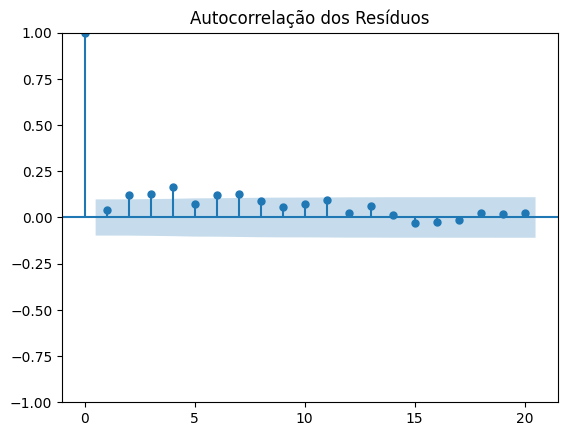

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

# Gráfico de Autocorrelação
plot_acf(model.resid, lags=20)
plt.title('Autocorrelação dos Resíduos')
plt.show()

In [14]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Teste de Breusch-Pagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))


# O P- value p-value': np.float64(2.7824355863735325e-07) é maior que 0.05, logo não rejeitamos a hipótese nula de homocedasticidade


{'Lagrange multiplier statistic': np.float64(36.082767392932794), 'p-value': np.float64(2.7824355863735325e-07), 'f-value': np.float64(13.0879355774004), 'f p-value': np.float64(3.6348388387095645e-08)}


In [15]:
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              purchased   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     112.4
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           1.14e-52
Time:                        09:18:49   Log-Likelihood:                -150.16
No. Observations:                 400   AIC:                             308.3
Df Residuals:                     396   BIC:                             324.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6081      0.048    -12.761      0.000      -0.702      -0.514
age                  0.0266      0.002     15.518      0.000       0.023       0.030
estimated_salary   3.84e-06   5.27e-07      7.290      0.000     2.8e-06    4.88e-06
gender_Female       -0.3122      0.031    -10.123      0.000      -0.373      -0.252
gender_Male         -0.2960      0.029    -10.359      0.000      -0.352      -0.240
==============================================================================
Omnibus:                       14.246   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.998
Skew:                           0.060   Prob(JB):                       0.0302
Kurtosis:                       2.363   Cond. No.                     9.40e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.73e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [16]:
# Train and Test Model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/Users/diogofaria/.local/share/virtualenvs/statistics-model-list-02-6DfH3D3F/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.86


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[61,  2],
       [12, 25]])

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

np.float64(0.821964821964822)

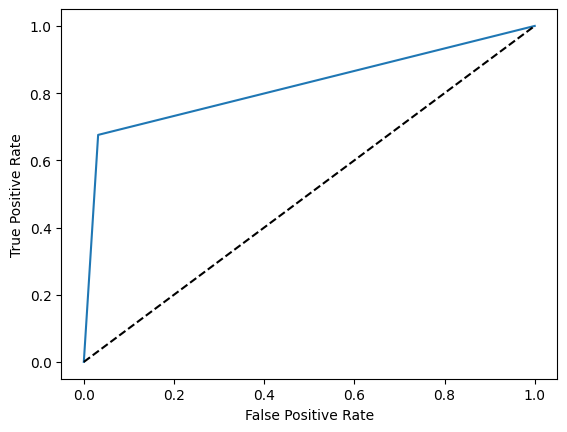

In [23]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()